Load the Database from SQL Server

In [1]:
import pandas as pd
import pyodbc

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost;"
    "DATABASE=CreditRiskDB;"
    "Trusted_Connection=yes;"
)

query = "SELECT * FROM Card_Defaults_"
df = pd.read_sql(query, conn)
print(df.shape)
print(df.head())

C:\Users\amanp\AppData\Local\Temp\ipykernel_24256\2971954413.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


(30000, 25)
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default_  
0       0.0       0.0       0.

In [ ]:
df = df.drop(columns=['ID'])

# Handle missing values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

# Rename target column
df.rename(columns={'default_': 'default'}, inplace=True)

# Split features & target
X = df.drop('default', axis=1)
y = df['default']

# Scale numeric columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Predictive Modeling 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_pred_rf))



Logistic Regression Accuracy: 0.81
Random Forest Accuracy: 0.7915
Random Forest ROC-AUC: 0.7045353687688606


Vizualization using Matplotlib and Seaborn

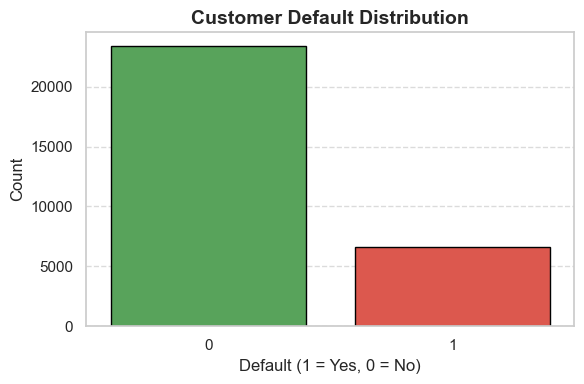

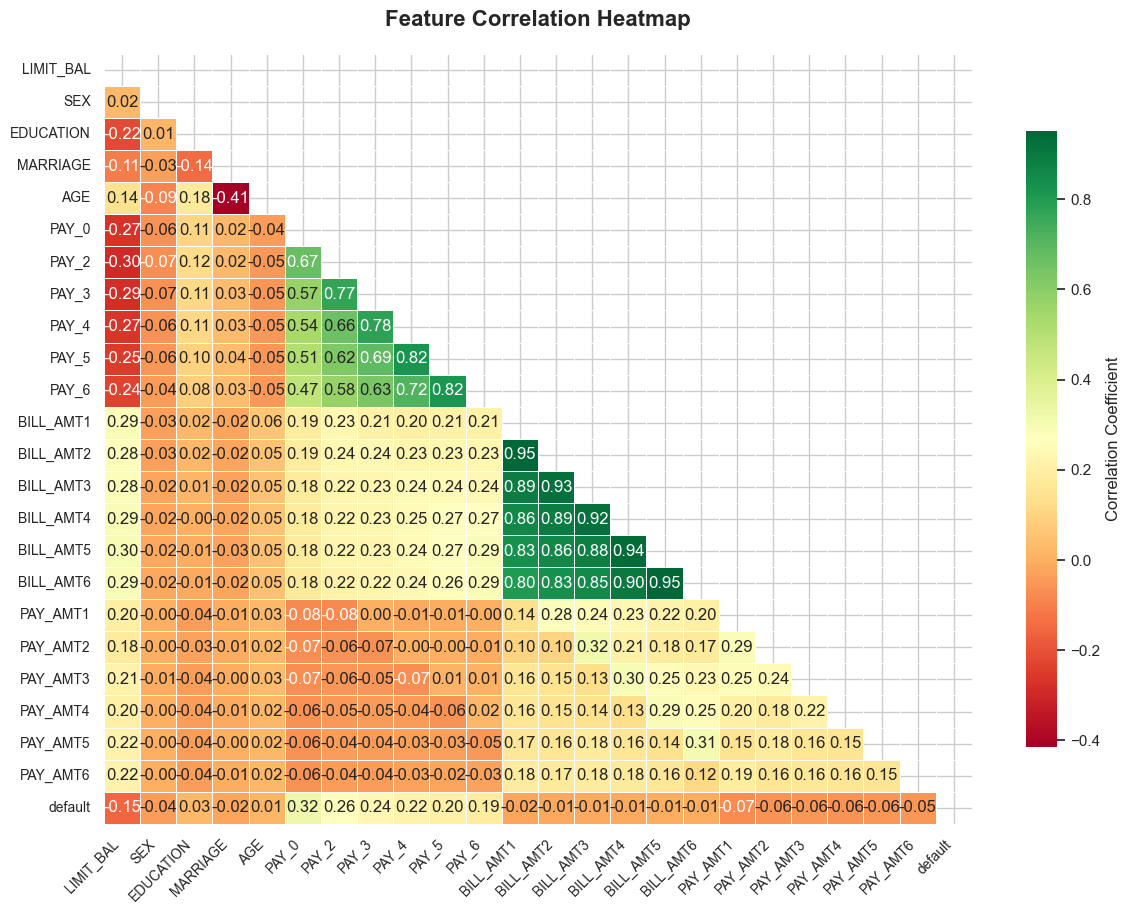

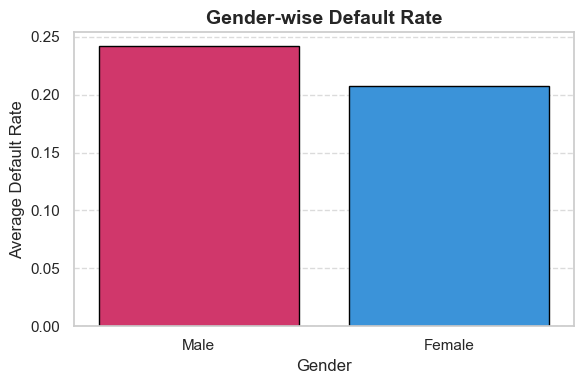

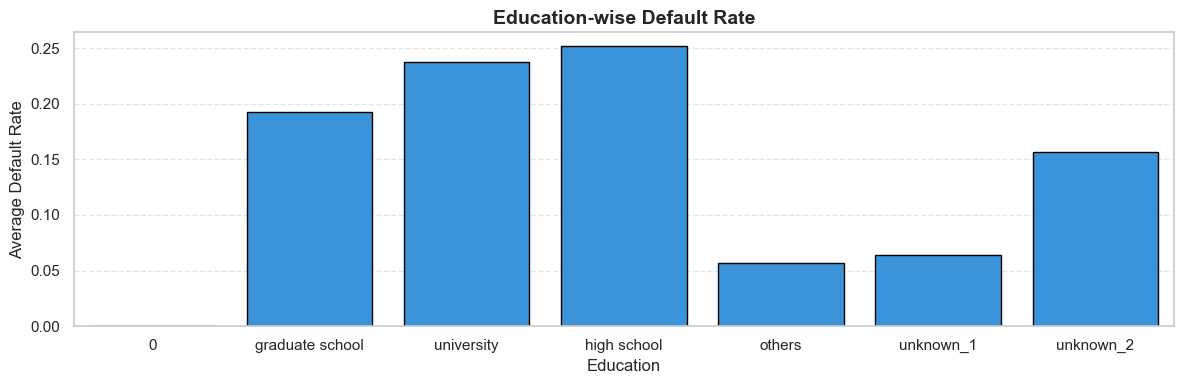

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")

plt.figure(figsize=(6, 4))
ax = sns.countplot(
    data=df,
    hue='default',
    x='default',
    palette=['#4CAF50', '#F44336'],
    edgecolor='black',
    legend=False
)
plt.title('Customer Default Distribution', fontsize=14, weight='bold')
plt.xlabel('Default (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 10))
corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='RdYlGn',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)
plt.title('Feature Correlation Heatmap', fontsize=16, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.figure(figsize=(6, 4))
gender_default = (
    df.groupby('SEX')['default']
    .mean()
    .reset_index()
    .replace({'SEX': {1: 'Male', 2: 'Female'}})
)

sns.barplot(
    data=gender_default,
    hue='default',
    x='SEX',
    y='default',
    palette=['#2196F3', '#E91E63'],
    edgecolor='black',
    legend=False
)
plt.title('Gender-wise Default Rate', fontsize=14, weight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Default Rate', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
education_default = (
    df.groupby('EDUCATION')['default']
    .mean()
    .reset_index()
    .replace({'EDUCATION': {1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others' , 5: 'unknown_1', 6: 'unknown_2'}})
)

sns.barplot(
    data=education_default,
    hue='default',
    x='EDUCATION',
    y='default',
    palette=['#2196F3','#2196F3','#2196F3','#2196F3','#2196F3','#2196F3','#2196F3',],
    edgecolor='black',
    legend=False
)
plt.title('Education-wise Default Rate', fontsize=14, weight='bold')
plt.xlabel('Education', fontsize=12)
plt.ylabel('Average Default Rate', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


